In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_entrenamiento = 'G:/Mi unidad/Letras/train'
data_validacion = 'G:/Mi unidad/Letras/valid'

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "G:/Mi unidad/Letras/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "G:/Mi unidad/Letras/valid",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "G:/Mi unidad/Letras/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 161 files belonging to 3 classes.
Found 60 files belonging to 3 classes.
Found 15 files belonging to 3 classes.


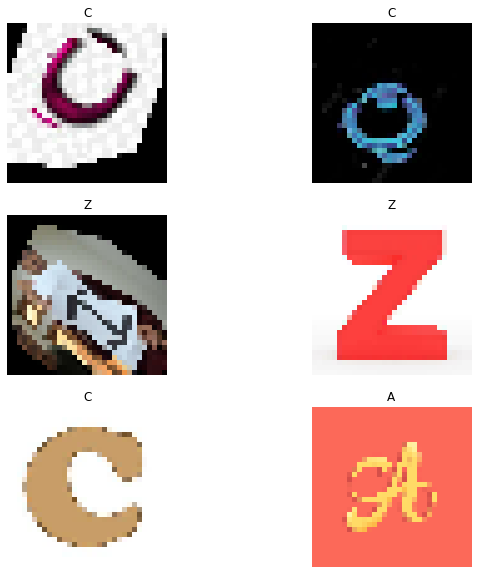

In [ ]:
class_names = ["A", "C", "Z"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(6):
  
    ax = plt.subplot(3, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(4)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
9/9 [==============================] - 0s 17ms/step - loss: 1.0507 - accuracy: 0.4658 - val_loss: 1.1389 - val_accuracy: 0.3167
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 1.2155 - accuracy: 0.3602 - val_loss: 1.0449 - val_accuracy: 0.4833
Epoch 3/10
9/9 [==============================] - 0s 14ms/step - loss: 0.9709 - accuracy: 0.5839 - val_loss: 1.0555 - val_accuracy: 0.4500
Epoch 4/10
9/9 [==============================] - 0s 15ms/step - loss: 0.9121 - accuracy: 0.5839 - val_loss: 0.9771 - val_accuracy: 0.5167
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 0.8935 - accuracy: 0.5466 - val_loss: 0.9319 - val_accuracy: 0.5833
Epoch 6/10
9/9 [==============================] - 0s 14ms/step - loss: 0.7616 - accuracy: 0.6770 - val_loss: 0.8814 - val_accuracy: 0.5500
Epoch 7/10
9/9 [==============================] - 0s 14ms/step - loss: 0.8011 - accuracy: 0.5839 - val_loss: 0.9376 - val_accuracy: 0.5500
Epoch 8/10
9/9 [===========

In [ ]:
model.evaluate(test_ds)

1/1 [==============================] - 0s 48ms/step - loss: 0.7110 - accuracy: 0.7333


[0.7110292911529541, 0.7333333492279053]

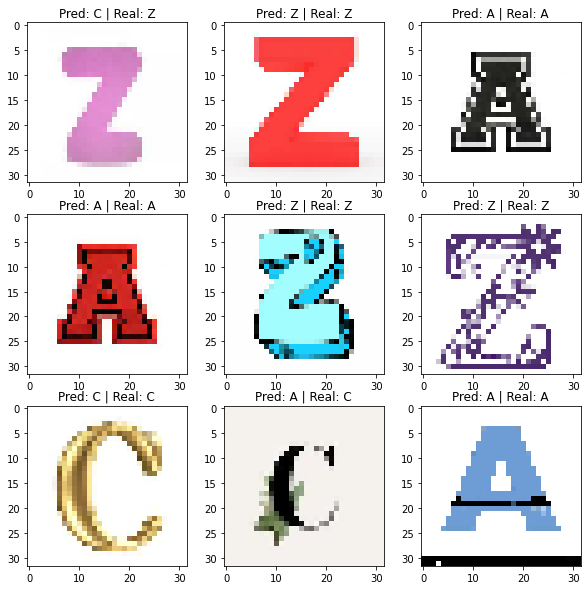

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
saved_keras_model = 'modeloletras.h5'
model.save(saved_keras_model)

In [ ]:
model_json = model.to_json()
with open("modeloletras.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
model.save_weights("modeloletras.h5")
print("Modelo Guardado!")

Modelo Guardado!
